[-4.         -3.76470588 -3.52941176 -3.29411765 -3.05882353 -2.82352941
 -2.58823529 -2.35294118 -2.11764706 -1.88235294 -1.64705882 -1.41176471
 -1.17647059 -0.94117647 -0.70588235 -0.47058824 -0.23529412  0.
  0.23529412  0.47058824  0.70588235  0.94117647  1.17647059  1.41176471
  1.64705882  1.88235294  2.11764706  2.35294118  2.58823529  2.82352941
  3.05882353  3.29411765  3.52941176  3.76470588  4.        ]


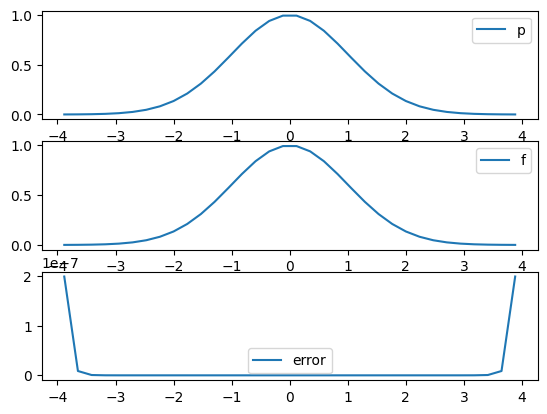

In [101]:
import numpy as np
import matplotlib.pyplot as plt



m=34
a = -4
b = 4

i_range = np.arange(m + 1)
x_range = a + (b-a) / m * i_range
t_range = (x_range[1:]+x_range[:-1]) / 2
print(x_range)

def newton(x_val):
    m =  len(x_range)
    s_range = np.exp(- x_range ** 2 / 2)
    b_list = np.zeros(shape=(m,m))
    b_list[0] = s_range
    ret = b_list[0][0]
    for i in range(1,m):
        b_list[i,i:m] = np.diff(b_list[i-1,i-1:m]) / (x_range[i:m]-x_range[0:m-i])
        ret += b_list[i][i] * np.prod(x_val-x_range[0:i])
    return ret
newton = np.vectorize(newton)

newton_range = newton(t_range)
exp_range = np.exp(- t_range ** 2 / 2)
error_range = abs(newton_range-exp_range)

fig, ax = plt.subplots(3)
ax[0].plot(t_range, newton_range, label='p')
ax[0].legend()
ax[1].plot(t_range, exp_range, label='f')
ax[1].legend()
ax[2].plot(t_range, error_range, label='error')
ax[2].legend()



